# Affinity Propagation for Ethereum Fraud Detection
This notebook demonstrates unsupervised learning using Affinity Propagation on the Ethereum transaction dataset to identify potential fraudulent patterns.

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Set display options
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

In [10]:
# Load the dataset
data_path = '../Data/address_data_combined.csv'
df = pd.read_csv(data_path)
print(f'Dataset loaded, shape: {df.shape}')

# Display the first few rows and column information
print("\nFirst 5 rows of the dataset:")
display(df.head())

print("\nDataset information:")
display(df.info())

print("\nSummary statistics:")
display(df.describe())

Dataset loaded, shape: (14155, 14)

First 5 rows of the dataset:


,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Unique Received From Addresses,min value received,max value received,avg val received,min val sent,avg val sent,total transactions (including tnx to create contract,total ether received,total ether balance
0,0x87d884aaa6ff9e9b6014631b0abae80b53953fb8,1,5151.68,15159.08,71235.62,1,0.010000,0.020000,0.013367,0.000000,0.000000,8,0.040100,0.040100
1,0xd42393df90d582bd8a5493171f0173e3a017d391,1,1179.02,1124.89,25126.45,13,0.000000,0.750000,0.176667,0.145000,0.419270,22,2.650000,-0.284889
2,0x3025c36d8a9620d3df89e9e9b1acbdfd639a6f37,1,361.73,0.00,723.47,1,4.999916,4.999916,4.999916,2.490000,2.499538,3,4.999916,0.000840
3,0x6309f709faad518fc158af4c14edfa7b06424770,1,0.00,0.00,0.00,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000
4,0x3d020954e30c3d40b7f0c533cf198bc10dd45a49,1,14280.60,1479.86,45357.57,21,0.035000,0.200000,0.099286,2.084658,2.084658,22,2.085000,0.000342



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14155 entries, 0 to 14154
Data columns (total 14 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Address                                               14155 non-null  object 
 1   FLAG                                                  14155 non-null  int64  
 2   Avg min between sent tnx                              14155 non-null  float64
 3   Avg min between received tnx                          14155 non-null  float64
 4   Time Diff between first and last (Mins)               14155 non-null  float64
 5   Unique Received From Addresses                        14155 non-null  int64  
 6   min value received                                    14155 non-null  float64
 7   max value received                                    14155 non-null  float64
 8   avg val received                  

None


Summary statistics:


,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Unique Received From Addresses,min value received,max value received,avg val received,min val sent,avg val sent,total transactions (including tnx to create contract,total ether received,total ether balance
count,14155.000000,1.415500e+04,14155.000000,1.415500e+04,14155.000000,14155.000000,14155.000000,14155.000000,14155.000000,14155.000000,14155.000000,1.415500e+04,1.415500e+04
mean,0.460473,8.118597e+03,7020.946759,1.901450e+05,28.484422,34.249649,376.353259,75.994578,5.690614,35.796158,214.417096,8.113586e+03,1.016392e+03
std,0.498453,4.291410e+04,23506.649412,3.234800e+05,268.059421,356.729056,10853.726198,2417.913485,134.496880,239.333107,1144.652196,3.037182e+05,2.021339e+05
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-1.560535e+07
25%,0.000000,0.000000e+00,0.000000,7.335500e+01,1.000000,0.000000,0.340448,0.135969,0.000000,0.000328,3.000000,7.347425e-01,0.000000e+00
50%,0.000000,2.398000e+01,185.420000,2.093200e+04,2.000000,0.030000,3.000000,1.000000,0.009000,1.029530,8.000000,1.306701e+01,1.491000e-03
75%,1.000000,1.512990e+03,3594.655000,2.353702e+05,6.000000,0.954314,30.219703,7.995038,0.854173,10.134141,44.000000,1.010000e+02,1.760323e-02
max,1.000000,1.461535e+06,517161.100000,2.837470e+06,9999.000000,25533.614329,800000.000000,283618.831600,12000.000000,12766.806954,19995.000000,2.858159e+07,1.428864e+07


In [11]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
display(missing_values[missing_values > 0])

# Handle missing values (fill with means for numerical columns)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)

# Check if any known fraud labels exist in the dataset
if 'FLAG' in df.columns or 'is_fraud' in df.columns or 'label' in df.columns:
    label_col = 'FLAG' if 'FLAG' in df.columns else ('is_fraud' if 'is_fraud' in df.columns else 'label')
    print(f"\nFraud label distribution:\n{df[label_col].value_counts()}")

Missing values per column:


Series([], dtype: int64)


Fraud label distribution:
FLAG
0    7637
1    6518
Name: count, dtype: int64


In [13]:
# Select features for clustering (adjust based on your dataset)
# Common Ethereum features might include transaction counts, values, fees, etc.
# Dropping any non-numeric or identifier columns
feature_df = df.select_dtypes(include=['float64', 'int64'])

# If there are too many columns, you might want to drop some based on domain knowledge
cols_to_drop = []
# Add any columns to exclude (like IDs, timestamps, etc)
if 'address' in feature_df.columns:
    cols_to_drop.append('address')
if 'time' in feature_df.columns:
    cols_to_drop.append('time')
if 'timestamp' in feature_df.columns:
    cols_to_drop.append('timestamp')
if 'block_number' in feature_df.columns:
    cols_to_drop.append('block_number')

feature_df = feature_df.drop(columns=cols_to_drop, errors='ignore')

print(f"Selected {feature_df.shape[1]} features for clustering")
print("Features used:", feature_df.columns.tolist())

Selected 13 features for clustering
Features used: ['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx', 'Time Diff between first and last (Mins)', 'Unique Received From Addresses', 'min value received', 'max value received ', 'avg val received', 'min val sent', 'avg val sent', 'total transactions (including tnx to create contract', 'total ether received', 'total ether balance']


In [14]:
# Normalize the features for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(feature_df)

# Apply PCA for visualization later
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(f"Variance explained by 2 PCA components: {sum(pca.explained_variance_ratio_)*100:.2f}%")

Variance explained by 2 PCA components: 30.66%


In [15]:
# Apply Affinity Propagation
# Note: We'll use a subsample if the dataset is very large
MAX_SAMPLES = 5000
if X_scaled.shape[0] > MAX_SAMPLES:
    print(f"Dataset is large ({X_scaled.shape[0]} rows). Using {MAX_SAMPLES} random samples for clustering.")
    sample_indices = np.random.choice(X_scaled.shape[0], size=MAX_SAMPLES, replace=False)
    X_sample = X_scaled[sample_indices]
    X_pca_sample = X_pca[sample_indices]
else:
    X_sample = X_scaled
    X_pca_sample = X_pca
    sample_indices = np.arange(X_scaled.shape[0])

# Apply clustering with dampening parameter to control number of clusters
# Higher dampening reduces the number of clusters
print("Fitting Affinity Propagation model...")
affinity = AffinityPropagation(damping=0.9, random_state=42)
cluster_labels = affinity.fit_predict(X_sample)

# Show number of clusters identified
n_clusters = len(np.unique(cluster_labels))
print(f"Number of clusters identified: {n_clusters}")

Dataset is large (14155 rows). Using 5000 random samples for clustering.
Fitting Affinity Propagation model...


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Number of clusters identified: 145


In [16]:
# Evaluate the clustering with silhouette score
if n_clusters > 1:  # Can only calculate silhouette if there are at least 2 clusters
    silhouette_avg = silhouette_score(X_sample, cluster_labels)
    print(f"Silhouette Score: {silhouette_avg:.3f}")
else:
    print("Only one cluster identified. Silhouette score cannot be calculated.")

# Display cluster centers
cluster_centers = affinity.cluster_centers_indices_
print(f"\nCluster centers are at indices: {cluster_centers}")
print("\nFeature values at cluster centers:")
center_df = pd.DataFrame(
    scaler.inverse_transform(X_sample[affinity.cluster_centers_indices_]), 
    columns=feature_df.columns
)
display(center_df)

Silhouette Score: 0.497

Cluster centers are at indices: [  23   98  203  219  250  274  299  320  406  420  443  522  526  544
  584  598  610  624  637  673  691  717  748  777  804  854  990 1014
 1034 1076 1077 1093 1199 1207 1210 1221 1225 1273 1358 1388 1398 1472
 1474 1537 1558 1592 1633 1706 1708 1728 1743 1744 1824 1893 1905 2003
 2016 2058 2104 2167 2174 2243 2265 2269 2291 2318 2322 2328 2351 2361
 2363 2403 2443 2519 2575 2648 2826 2883 2924 2939 2948 3047 3084 3087
 3093 3105 3128 3144 3165 3240 3246 3298 3304 3349 3373 3461 3470 3484
 3485 3512 3534 3564 3573 3603 3609 3611 3631 3640 3665 3674 3697 3725
 3729 3806 3883 3975 3978 3988 4014 4016 4099 4248 4279 4286 4315 4322
 4342 4355 4409 4460 4472 4505 4563 4586 4662 4678 4687 4693 4695 4700
 4703 4704 4758 4791 4822]

Feature values at cluster centers:


,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Unique Received From Addresses,min value received,max value received,avg val received,min val sent,avg val sent,total transactions (including tnx to create contract,total ether received,total ether balance
0,1.0,398559.43,48258.20,495075.83,2.0,0.007134,0.090000,0.048567,0.096098,0.096098,3.0,0.097134,0.001035
1,1.0,4200.84,64431.56,299734.68,4.0,0.040000,4.229801,2.368389,0.000000,0.946298,14.0,9.473557,0.010576
2,1.0,4579.95,43082.47,1373050.28,26.0,0.000000,2.100000,0.429062,0.000000,0.519084,56.0,12.442812,-1.572458
3,1.0,1283.27,159452.67,320188.62,2.0,0.031779,0.200000,0.115889,0.230000,0.230000,3.0,0.231779,0.001779
4,0.0,0.00,50.94,509376.30,1625.0,0.000000,570.129274,4.491976,0.000000,0.000000,10000.0,44915.266720,44915.266720
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,1.0,59907.17,870.40,134611.07,15.0,0.500000,10.000000,1.420172,0.999139,12.070605,19.0,24.142932,0.001722
141,1.0,121470.51,5888.04,672121.02,10.0,0.023529,4.970400,1.025345,0.000000,2.266561,16.0,11.278795,-0.054011
142,0.0,138727.59,9592.23,473736.12,5.0,0.090000,19.634204,6.891373,0.100000,13.782306,9.0,41.348241,0.001323
143,0.0,1.31,0.12,4.15,2.0,98.376485,1902.623515,1000.500000,5.000000,666.999528,5.0,2001.000000,0.001415


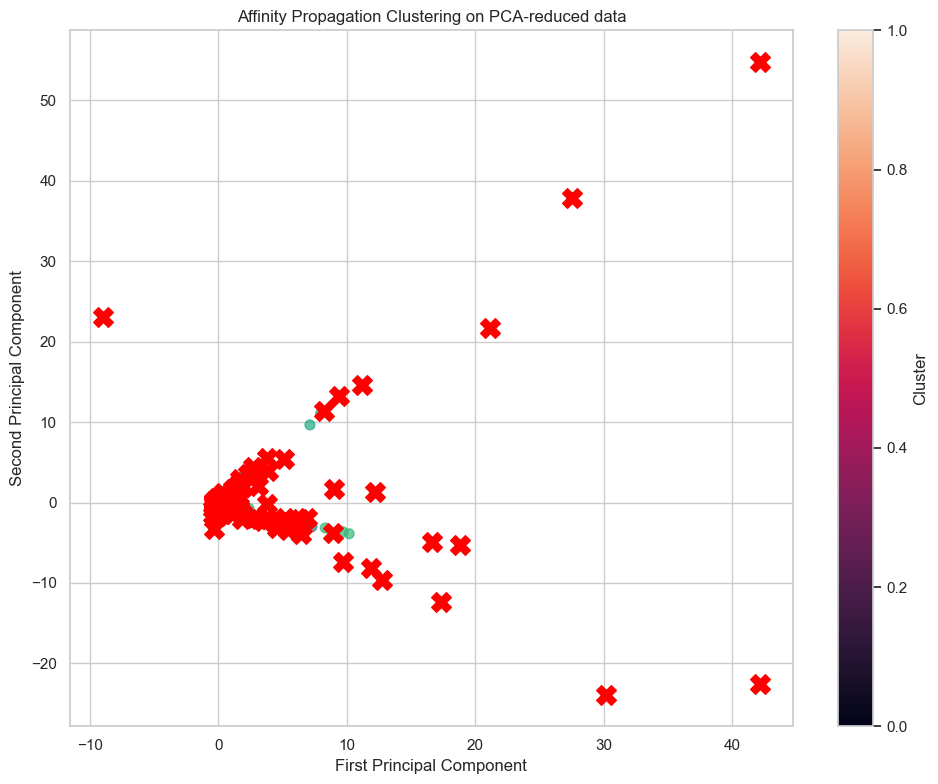

In [17]:
# Visualize the clusters using PCA components
plt.figure(figsize=(10, 8))
plt.scatter(X_pca_sample[:, 0], X_pca_sample[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(X_pca_sample[cluster_centers, 0], X_pca_sample[cluster_centers, 1], c='red', s=200, marker='X')
plt.title('Affinity Propagation Clustering on PCA-reduced data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()

Cluster sizes:


,cluster,count
0,0,1
1,1,14
2,2,10
3,3,2
4,4,3
...,...,...
140,140,40
141,141,8
142,142,12
143,143,18



Fraud ratio by cluster:


,cluster,fraud_ratio
0,0,1.0
61,61,1.0
77,77,1.0
1,1,1.0
71,71,1.0
...,...,...
75,75,0.0
74,74,0.0
73,73,0.0
70,70,0.0


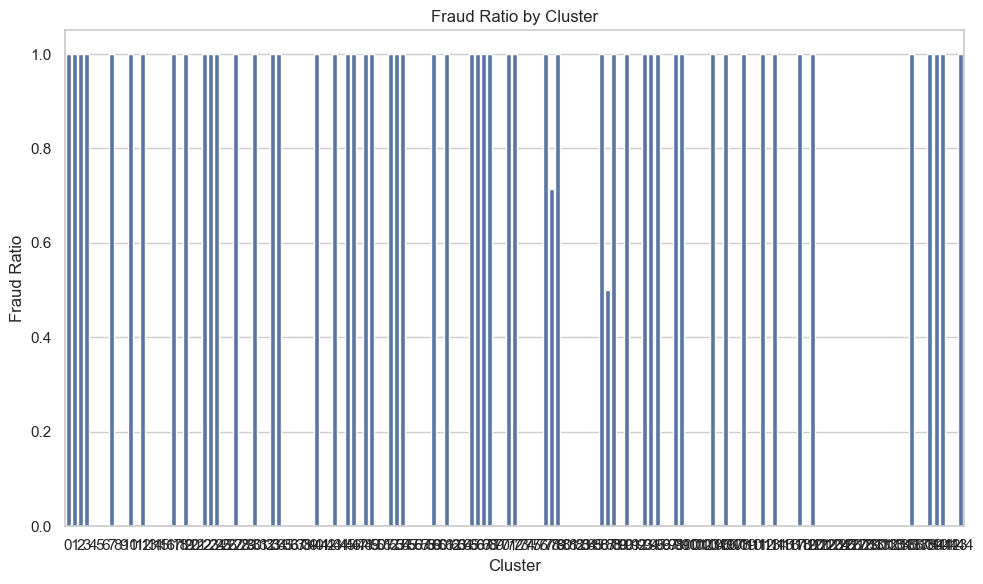

In [18]:
# Analyze clusters for potential fraud patterns
# Add the cluster assignments back to the original dataframe
sampled_df = df.iloc[sample_indices].copy()
sampled_df['cluster'] = cluster_labels

# Cluster statistics
cluster_stats = sampled_df.groupby('cluster').size().reset_index(name='count')
print("Cluster sizes:")
display(cluster_stats)

# If fraud labels exist, analyze the relationship
if 'FLAG' in sampled_df.columns or 'is_fraud' in sampled_df.columns or 'label' in sampled_df.columns:
    label_col = 'FLAG' if 'FLAG' in sampled_df.columns else ('is_fraud' if 'is_fraud' in sampled_df.columns else 'label')
    
    # Calculate fraud percentage by cluster
    fraud_by_cluster = sampled_df.groupby('cluster')[label_col].mean().reset_index()
    fraud_by_cluster.columns = ['cluster', 'fraud_ratio']
    
    print("\nFraud ratio by cluster:")
    display(fraud_by_cluster.sort_values('fraud_ratio', ascending=False))
    
    # Visualize fraud distribution
    plt.figure(figsize=(10, 6))
    sns.barplot(x='cluster', y='fraud_ratio', data=fraud_by_cluster)
    plt.title('Fraud Ratio by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Fraud Ratio')
    plt.tight_layout()
    plt.show()

Feature means by cluster:


,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Unique Received From Addresses,min value received,max value received,avg val received,min val sent,avg val sent,total transactions (including tnx to create contract,total ether received,total ether balance
cluster,,,,,,,,,,,,,
0,1.0,398559.430000,48258.200000,4.950758e+05,2.000000,0.007134,0.090000,0.048567,9.609824e-02,0.096098,3.000000,0.097134,0.001035
1,1.0,3155.271429,66071.547143,3.204752e+05,3.714286,1.856920,30.590256,11.097878,2.845952e+00,12.688658,91.071429,42.439832,-65.089664
2,1.0,14286.203000,40538.798000,1.378076e+06,22.000000,0.005217,9.757139,1.148367,5.681400e-05,0.758992,125.500000,25.925897,-56.833984
3,1.0,5309.860000,165947.285000,3.698820e+05,2.000000,0.028036,0.113414,0.070725,1.150000e-01,0.115000,6.500000,0.141449,0.026449
4,0.0,32.713333,25.656667,4.034775e+05,1767.333333,0.000017,1029.894559,12.378729,3.333333e-07,8.480768,10000.000000,62907.245779,15457.351402
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,1.0,59389.810500,1024.695750,1.234502e+05,7.350000,0.695424,7.536170,2.447158,4.851686e+00,10.408623,9.925000,27.327564,-0.187277
141,1.0,127164.766250,1999.132500,6.556970e+05,11.750000,0.276762,18.281915,8.121168,3.196163e-02,9.566431,18.625000,63.642470,-2.103628
142,0.0,146411.840000,4589.267500,4.582523e+05,1.500000,0.686441,3.489991,1.761766,1.000023e-01,1.992125,6.333333,6.680366,0.041721


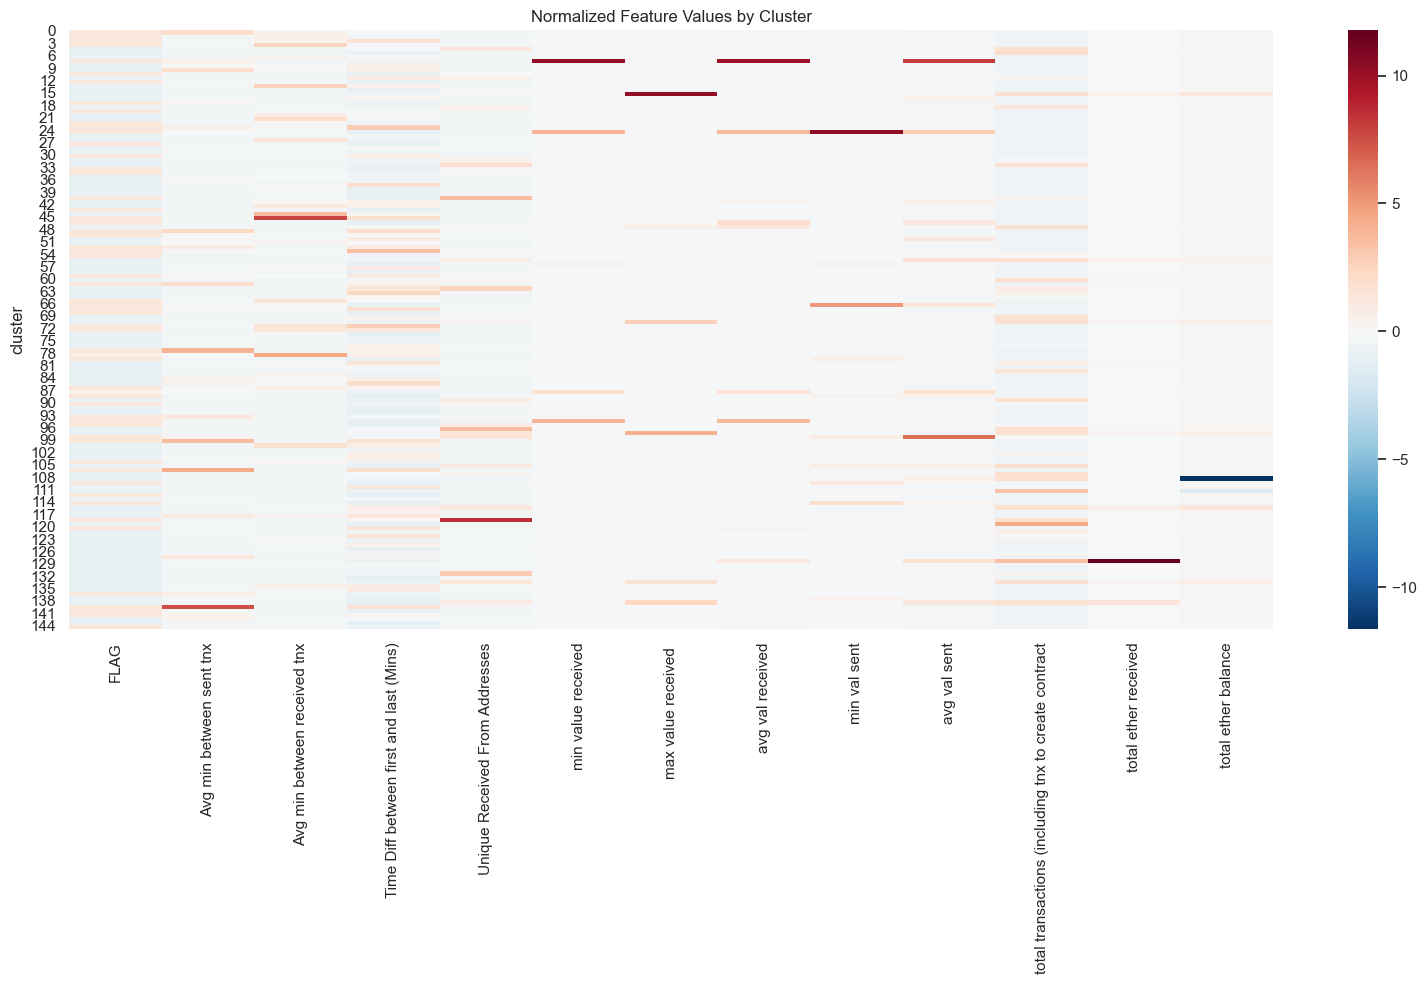

In [19]:
# Analyze cluster characteristics
# Calculate mean of each feature by cluster
cluster_means = sampled_df.groupby('cluster')[feature_df.columns].mean()

print("Feature means by cluster:")
display(cluster_means)

# Heatmap of cluster characteristics
plt.figure(figsize=(16, 10))
# Normalize for better visualization
cluster_means_norm = (cluster_means - cluster_means.mean()) / cluster_means.std()
sns.heatmap(cluster_means_norm, cmap='RdBu_r', center=0, annot=False)
plt.title('Normalized Feature Values by Cluster')
plt.tight_layout()
plt.show()

## Conclusions

1. The Affinity Propagation algorithm identified distinct clusters in the Ethereum transaction data.
2. Each cluster represents different transaction patterns that may correlate with different types of blockchain behavior.
3. Clusters with unusual characteristics (particularly high or low feature values relative to other clusters) could represent anomalous behavior worthy of investigation.
4. These clusters can be used as features in supervised models or for direct identification of potentially fraudulent accounts.